## **Lectura 2: Representaciones de los problemas de flujo** 

### Formas de representar un gráfo

1. Representación matemática analítica $G= (N,A)$
    * Demostraciones formales
    * Análisis de complejidad
2. Representaciòn gráfica
    * Visualización
    * Intuición
    * Comunicación
3. Representación computacional
    * Algoritmos
    * Estructuras de datos
    * La representación escogida afectará el desempeño de los algoritmos
    
Dos tipos de información:
1. Topología
    * Nodos
    * Arcos
2. Datos asociados a nodos y arcos
    * Costos
    * Capacidad
    * Demanda
    * etc.

Dos tipos de representación numérica:
1. Matrices
    * Matriz de adyacencia
    * Matriz de incidencia
2. Listas
    * Lista de adyacencia
    * Lista de incidencia

## Representaciones de Redes en Optimización para Flujo en Redes

En el estudio de optimización de flujo en redes, es crucial poder representar y manipular redes de manera eficiente. Hay varias formas de representar una red, y la elección de una representación puede depender de las necesidades específicas del problema a resolver. Basándonos en el libro de Ahuja, abordaremos las siguientes representaciones:

1. Matriz de Incidencia Nodo-Arco
2. Matriz de Incidencia Nodo-Nodo
3. Lista de Adjacencia
4. Forward and Reverse Star Representation

Ahora, examinaremos cada una de ellas.



### 1. Matriz de Incidencia Nodo-Arco

Para una red con $ n $ nodos y $ m $ arcos, la matriz de incidencia nodo-arco es una matriz $ n \times m $. Cada columna representa un arco y cada fila un nodo. 

**Cuándo usarla:** Es especialmente útil para problemas en los que necesitamos saber cómo los arcos están conectados a los nodos, por ejemplo, en problemas de corte mínimo.


**Ejemplo:** Considere una red simple con tres nodos y tres arcos: (1,2), (2,3) y (1,3).


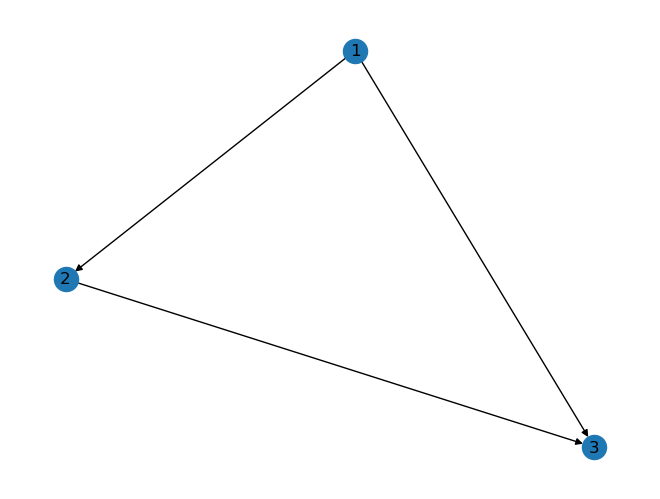

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from([(1,2), (2,3), (1,3)])

# Mostrar el grafo
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

La matriz de incidencia nodo-arco es:

```
   (1,2) (2,3) (1,3)
1    -1      0      -1
2     1     -1       0
3     0      1       1
```

**Note que**
1. es una matriz de $nxm$ donde $n$ es el número de nodos y $m$ es el número de arcos.
2. Cada columna representa un arco y cada fila un nodo.
3. Los elementos de la matriz son 0, 1 o -1. Un 1 en la fila $i$ y la columna $j$ indica que el arco $j$ sale del nodo $i$. Un -1 en la fila $i$ y la columna $j$ indica que el arco $j$ entra al nodo $i$. Un 0 en la fila $i$ y la columna $j$ indica que el arco $j$ no está conectado al nodo $i$.

**Ejemplo**
Los datos se envían desde los servidores de los nodos 1 y 2 a los terminales de los nodos 3, 4, 5. El coste del tráfico en el enlace entre los nodos i y j es $c_{ij}$ SEK/Kbyte. Queremos minimizar el coste total del tráfico de datos.

![image.png](../Images/arc-node-matrix1.png)

![image.png](../Images/arc-node-matrix2.png)

![image.png](../Images/arc-node-matrix3.png)

**Ejemplo 2**

![image.png](../Images/arc-node-matrix.png)


### 2. Matriz de Incidencia Nodo-Nodo

Esta es una matriz $n \times n$  donde el elemento en la fila $ i $ y la columna $ j $ indica si hay un arco entre el nodo $ i $ y el nodo $ j $.

**Cuándo usarla:** Es útil cuando necesitamos acceder rápidamente a la información sobre la conectividad entre pares de nodos. Es eficiente para redes densas.


**Ejemplo:**
```
   1  2  3
1  0  1  1
2  0  0  1
3  0  0  0
```


**Note que**
1. es una matriz de $nxn$ donde $n$ es el número de nodos.
2. Cada columna representa un nodo y cada fila un nodo.
3. Los elementos de la matriz son 0 o 1. Un 1 en la fila $i$ y la columna $j$ indica que hay un arco del nodo $i$ al nodo $j$. Un 0 en la fila $i$ y la columna $j$ indica que no hay un arco del nodo $i$ al nodo $j$.
4. la suma de los elementos de la fila $i$ es igual al grado de salida del nodo $i$.
5. la suma de los elementos de la columna $j$ es igual al grado de entrada del nodo $j$.
6. La matriz posse $n^2$ elementos, de los cuales $m$ son distintos de cero. Por lo tanto, la matriz es ineficiente en redes dispersas: la mayoría de los elementos son cero.
7. Cada atributo exige cerar una matriz. Por ejemplo, si se desea almacenar la capacidad de cada arco, se debe crear una matriz de capacidad de $nxn$.
8. Revisar los arcos que salen de un nodo en particular exigen recorrer toda la fila, esto puede ser ineficiente en redes dispersas.




**Preguntas de interes:**
1. ¿Que representa $A^2$?

El elemento $ij$ de $A^2$ es el número de caminos de longitud 2 entre el nodo $i$ y el nodo $j$. Es decir, el número de caminos que comienzan en el nodo $i$, pasan por un nodo intermedio y terminan en el nodo $j$.

$$a'_{ij} = \sum_{k=1}^n a_{ik}a_{kj}$$
 
1. ¿Que representa $A^k$?


### 3. Lista de Adjacencia

En esta representación, para cada nodo, mantenemos una lista de los nodos a los que está directamente conectado. La red $G(N,A)$ se puede representar como un vector $V$ de dimensión $n$ que almacena la cabeza al comienzo de la lista del nodo $i$ . El orden de los elementos en la lista no es importante.

**Cuándo usarla:** Es útil para recorridos en grafos y cuando el grafo es esparcido (tiene pocos arcos en comparación con el total posible).

**Ejemplo:**

![image.png](../Images/Lista_adyacencia.png)


### 4. Forward Star Representation

La representación de estrella hacia adelante almacena un grafo $G(N,A)$ en una serie de arreglos de dimensión $m$, que almacenan para cada arco cola, cabeza y costo. La cola del arco $j$ se almacena en el arreglo $tail$, la cabeza del arco $j$ se almacena en el arreglo $head$ y el costo del arco $j$ se almacena en el arreglo $cost$.

**Cuándo usarla:** Es útil para algoritmos que necesitan considerar arcos en un solo sentido, como en los algoritmos de flujo máximo.

**Ejemplo:**

![image.png](../Images/forward.png)

![image.png](../Images/forward2.png)

**Note que**
1. Podemos obtener el grado de salida de un nodo $i$ contando el número de veces que aparece el nodo $i$ en el arreglo $tail$.
2. Podemos obtener el grado de salida del nodo $i$ contando el número de veces que aparece el nodo $i$ en el arreglo $head$.
3. Usando el vector puntero, vemos que el grado de salida es $puntero(i+1)-puntero(i)$.

### 5. Barward Star Representation

Estas son listas de nodos que están directamente conectados a un nodo particular, la representación de estrella hacia atrás da todos los nodos desde los que viene un arco.

**Ejemplo:**

![image.png](../Images/backward.png)

![image.png](../Images/backward.png)



# Representación combinada

Las últimas notaciones puede ser combinada sin necesidad de repetir información. Para esto creamos un vector de rastreo de dimensión $m$.

![image.png](../Images/combinada.png)

![image.png](../Images/combinada2.png)

![image.png](../Images/combinada3.png)
